In [1]:
import sys
sys.path.append('..')

from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
import numpy as np

import mdgrad
import mdgrad.nn as nn
import mdgrad.optim as optim

In [2]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

In [3]:
X_train, X_test = np.expand_dims(train_examples, -1).transpose(0, 3, 1, 2), np.expand_dims(test_examples, -1).transpose(0, 3, 1, 2)
y_train, y_test = train_labels, test_labels

In [4]:
model = nn.Sequential(
    nn.Conv2d(1, 5, 2),
    nn.AvgPool2d(2, stride=2),
    nn.Tanh(),
    nn.Conv2d(5, 7, 2),
    nn.AvgPool2d(2, stride=2),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(252, 100),
    nn.Tanh(),
    nn.Linear(100, 10)
)

In [5]:
lr = 2e-2
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [6]:
def accuracy(y_pred, y_true):
    return mdgrad.sum(y_pred == y_true)[0] / len(y_pred)

In [7]:
losses, accs = [], []

for i in range(100):
    # Training on the test set and testing on the train set
    # because training was taking too long otherwise
    y_pred = model(X_test)
    loss = loss_fn(y_pred, y_test)
    acc = accuracy(mdgrad.argmax(y_pred, axis=1), y_test)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.numpy())
    accs.append(acc)
    if (i+1) % 10 == 0 or i == 0: 
        print(f'Epoch: {i+1}\tLoss: {loss.numpy():.4f}\tAccuracy: {acc:.4f}')

Epoch: 1	Loss: 2.4162	Accuracy: 0.1394
Epoch: 10	Loss: 1.3260	Accuracy: 0.5339
Epoch: 20	Loss: 0.9487	Accuracy: 0.6929
Epoch: 30	Loss: 0.8170	Accuracy: 0.7536
Epoch: 40	Loss: 0.7710	Accuracy: 0.7908
Epoch: 50	Loss: 0.7207	Accuracy: 0.8755
Epoch: 60	Loss: 0.6506	Accuracy: 0.8938
Epoch: 70	Loss: 0.6094	Accuracy: 0.9101
Epoch: 80	Loss: 0.5739	Accuracy: 0.9205
Epoch: 90	Loss: 0.5530	Accuracy: 0.9275
Epoch: 100	Loss: 0.5373	Accuracy: 0.9312


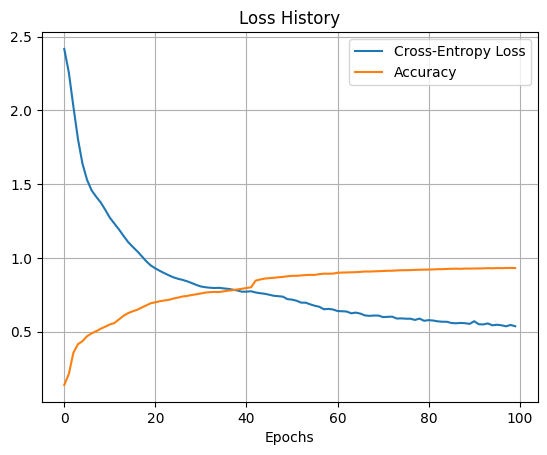

In [8]:
plt.plot(losses, label='Cross-Entropy Loss')
plt.plot(accs, label='Accuracy')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [9]:
preds = model(X_train)
preds = mdgrad.argmax(preds, axis=1)
test_acc =  accuracy(preds, y_train)
print(f'Test Set Accuracy: {100*test_acc:.2f}%')

Test Set Accuracy: 89.88%


Text(0.5, 1.0, 'Predicted Label: 7')

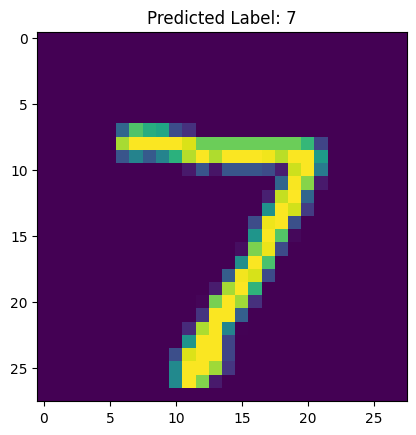

In [10]:
prediction = int(mdgrad.argmax(model(X_test[0]), axis=1)[0])
plt.imshow(X_test[0].reshape(28, 28))
plt.title(f'Predicted Label: {prediction}')